In [333]:

import pandas as pd
import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import numpy as np
from datetime import datetime
datestr = "2023-2-1"
session = requests.Session()
retry = Retry(connect=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('http://', adapter)
session.mount('https://', adapter)
url = f'https://fubon-ebrokerdj.fbs.com.tw/z/zg/zgb/zgb0.djhtm?a=6010&b=6010&c=B&e={datestr}&f={datestr}'
r = session.get(url,verify= False)
df = pd.read_html(r.text)


In [ ]:
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2022, 1, 1)
end_date = date(2023, 6, 2)
for single_date in daterange(start_date, end_date):
    print(single_date.strftime("%Y-%m-%d"))

In [334]:
dfbuy = pd.DataFrame(df[3])
dfbuy.drop(index=0,axis=0,inplace=True)
dfbuy.rename(columns={0:dfbuy[0][1],1:dfbuy[1][1],2:dfbuy[2][1],3:dfbuy[3][1]},inplace=True)
dfbuy.drop(index=1,axis=0,inplace=True)
dfbuy.reset_index(drop=True,inplace=True)
dfbuy['stockid']=''
dfbuy['date'] = datetime.strptime(datestr,'%Y-%m-%d').date()


In [297]:
dfsell = pd.DataFrame(df[4])
dfsell.drop(index=0,axis=0,inplace=True)
dfsell.rename(columns={0:dfsell[0][1],1:dfsell[1][1],2:dfsell[2][1],3:dfsell[3][1]},inplace=True)
dfsell.drop(index=1,axis=0,inplace=True)
dfsell.reset_index(drop=True,inplace=True)
dfsell['stockid']=''
dfsell['date'] = datetime.strptime(datestr,'%Y-%m-%d').date()


In [4]:

import warnings
warnings.filterwarnings("ignore")
def fixdatastring_from_web(dfa):
    for idx in dfa.index:
        str1 = dfa['券商名稱'][idx]
        ss = str1.replace('<!-- \tGenLink2stk','').replace("('","").replace("'","").replace("); //-->","").replace("AS","")
        d = ss.split(',')
        if len(d) == 2:
            dfa['stockid'][idx]=d[0]
            dfa['券商名稱'][idx]=d[1]
        else:
            dfa['券商名稱'][idx]=d[0]

    return dfa
dfsell = fixdatastring_from_web(dfsell)
dfsell.head()

NameError: name 'dfsell' is not defined

In [335]:
dfbuy = fixdatastring_from_web(dfbuy)
dfbuy.head()

,券商名稱,買進金額,賣出金額,差額,stockid,date
0,世紀鋼,31643,0,31643,9958,2023-02-01
1,世界,29149,0,29149,5347,2023-02-01
2,聯發科,21605,0,21605,2454,2023-02-01
3,台光電,18330,0,18330,2383,2023-02-01
4,東元,11013,0,11013,1504,2023-02-01


In [ ]:
dfbuy = dfbuy.set_index(['stockid','date'])


In [348]:
fdf = pd.DataFrame(columns=dfbuy.columns)
isinstance(fdf,pd.DataFrame)

True

In [364]:
import pandas as pd
import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import numpy as np
from datetime import datetime


from datetime import date, timedelta


import warnings
warnings.filterwarnings("ignore")
def fixdatastring_from_web(dfa):
    for idx in dfa.index:
        str1 = dfa['券商名稱'][idx]
        ss = str1.replace('<!-- \tGenLink2stk','').replace("('","").replace("'","").replace("); //-->","").replace("AS","")
        d = ss.split(',')
        if len(d) == 2:
            dfa['stockid'][idx]=d[0]
            dfa['券商名稱'][idx]=d[1]
        else:
            dfa['券商名稱'][idx]=d[0]

    return dfa



def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2021, 1, 1)
end_date = date(2023, 2, 3)
fullbuy = None
for single_date in daterange(start_date, end_date):
    datestr = single_date.strftime("%Y-%m-%d")
    print(datestr)

    #datestr = "2023-2-1"
    session = requests.Session()
    retry = Retry(connect=3, backoff_factor=0.5)
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    url = f'https://fubon-ebrokerdj.fbs.com.tw/z/zg/zgb/zgb0.djhtm?a=8890&b=8890&c=B&e={datestr}&f={datestr}'
    r = session.get(url,verify= False)
    df = pd.read_html(r.text)
    
    dfbuy = pd.DataFrame(df[3])
    dfbuy.drop(index=0,axis=0,inplace=True)
    dfbuy.rename(columns={0:dfbuy[0][1],1:dfbuy[1][1],2:dfbuy[2][1],3:dfbuy[3][1]},inplace=True)
    dfbuy.drop(index=1,axis=0,inplace=True)
    dfbuy.reset_index(drop=True,inplace=True)
    dfbuy['stockid']=''
    dfbuy['date'] = datetime.strptime(datestr,'%Y-%m-%d').date()

    dfsell = pd.DataFrame(df[4])
    dfsell.drop(index=0,axis=0,inplace=True)
    dfsell.rename(columns={0:dfsell[0][1],1:dfsell[1][1],2:dfsell[2][1],3:dfsell[3][1]},inplace=True)
    dfsell.drop(index=1,axis=0,inplace=True)
    dfsell.reset_index(drop=True,inplace=True)
    dfsell['stockid']=''
    dfsell['date'] = datetime.strptime(datestr,'%Y-%m-%d').date()

    dfsell = fixdatastring_from_web(dfsell)
    dfbuy = fixdatastring_from_web(dfbuy)

    dfsell = dfbuy.set_index(['stockid','date'])
    dfbuy = dfbuy.set_index(['stockid','date'])
    if isinstance(fullbuy,pd.DataFrame) == False:
        fullbuy = pd.DataFrame(columns=dfbuy.columns,index=dfbuy.index)
        fullsell = pd.DataFrame(columns=dfbuy.columns,index=dfbuy.index)

    fullbuy = fullbuy.append(dfbuy)
    fullsell = fullsell.append(dfbuy)
    
#testdf['券商名稱'][datetime.strptime(datestr,'%Y-%m-%d').date()]

2022-06-01
2022-06-02
2022-06-03
2022-06-04


In [871]:
fullbroker_sell


,券商名稱,買進張數,賣出張數,差額,stockid,mainBroker,subBroker,date
0,00900富邦特選高股息30,2421,58,2363,,1020,1020,2022-03-01
1,00715L期街口布蘭特正2,1253,32,1221,,1020,1020,2022-03-01
2,緯創,1073,1,1072,3231,1020,1020,2022-03-01
3,00893國泰智能電動車,909,347,562,,1020,1020,2022-03-01
4,00671R富邦NDAQ反1,549,40,509,,1020,1020,2022-03-01
...,...,...,...,...,...,...,...,...
1105136,00773B中信優先金融債,16,0,16,,1040,1040,2023-02-06
1105137,台耀,17,1,16,4746,1040,1040,2023-02-06
1105138,第一銅,17,2,15,2009,1040,1040,2023-02-06
1105139,致和證,15,0,15,5864,1040,1040,2023-02-06


In [881]:
import gc
gc.collect()
s = fullbroker_sell.groupby(['mainBroker','subBroker']).count()



In [891]:
s['差額']['1020']

subBroker
1020    11500
1021    11500
1022    11500
1023    11500
1024    11500
1025    11500
1028    11500
1029    11500
102A    11500
102C    11500
102E    11500
Name: 差額, dtype: int64

In [939]:
stk.query(f"mainBroker=='{1020}' and subBroker=='{1021}'")

,券商名稱,買進張數,賣出張數,差額,stockid,mainBroker,subBroker
date,,,,,,,


In [ ]:
import pandas as pd
stk= pd.read_pickle('.\\broker\\broker_sell_1020.pkl')
borkerdf=pd.lo

Mborkerdfidx = borkerdf[borkerdf['MainBroder'] == 'Y']

totalcnt = len(borkerdf)
startcnt = 0

for Mborkeridx in Mborkerdfidx.index:
    Mborkerid = Mborkerdfidx['代號'][Mborkeridx]
    subBrokerid = borkerdf[borkerdf['證券商名稱'] ==  Mborkerdfidx['證券商名稱'][Mborkeridx]]
    for subbrokerIdidx in subBrokerid.index:
        if subBrokerid['subBroderId'][subbrokerIdidx] == subBrokerid['證券商名稱'][subbrokerIdidx]:
            subborkerid = Mborkerid
        else:
            subborkerid = subBrokerid['代號'][subbrokerIdidx]
        test = stk.query(f"mainBroker=='{Mborkerid}' and subBroker=='{subborkerid}'")
        if len(test) ==0:
            print(f"mainBroker=='{Mborkerid}' and subBroker=='{subborkerid}'")
#stk


In [8]:
import pandas as pd

stk= pd.read_pickle('.\\broker\\broker_sell_1160.pkl')
stk

,券商名稱,買進張數,賣出張數,差額,stockid,mainBroker,subBroker,date
0,友達,817,2155,-1338,2409,1160,1160,2022-03-01
0,台橡,70,267,-197,2103,1160,1161,2022-03-01
0,中信金,93,1481,-1388,2891,1160,1160,2022-03-07
1,上曜,11,438,-427,1316,1160,1160,2022-03-07
1,智原,117,278,-161,3035,1160,1161,2022-03-01
...,...,...,...,...,...,...,...,...
11745,富邦科技,0,5,-5,0052,1160,1161,2023-02-13
11746,樂事綠能,0,5,-5,1529,1160,1161,2023-02-13
11747,駿吉-KY,0,5,-5,1591,1160,1161,2023-02-13
11748,豐興,0,5,-5,2015,1160,1161,2023-02-13


In [ ]:
borkerdf

In [22]:
borkerdf.head()

ss = borkerdf[borkerdf['證券商名稱'] == '第一金']
ss


ss = borkerdf[borkerdf['代號'] == '5380']
ss


,代號,證券商名稱,地址,subBroderId,MainBroder
162,5380,第一金,台北市中山區長安東路一段22號4樓,第一金,Y


In [1]:
import pandas as pd
fullbroker_sell = pd.read_pickle('.\\broker\\broker_buy.pkl')

EOFError: Ran out of input

In [46]:
import pandas as pd

fullbroker_sell = pd.read_pickle('.\\broker\\broker_buy_1020.pkl')
s1021 = fullbroker_sell[fullbroker_sell['subBroker'] == '1021']
s1021.sort_values('date',inplace=True)
tt = s1021[s1021['stockid'] == '2330']
tt = tt.sort_index()
tt= tt.set_index('date')
tt = tt[~tt.index.duplicated(keep='first')]
tt

c:\Users\danson_tsui\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,券商名稱,買進張數,賣出張數,差額,stockid,mainBroker,subBroker
date,,,,,,,
2022-03-01,台積電,68,10,58,2330,1020,1021
2022-03-02,台積電,37,2,35,2330,1020,1021
2022-03-03,台積電,32,8,24,2330,1020,1021
2022-03-04,台積電,91,5,86,2330,1020,1021


In [47]:

fullbroker_sell = pd.read_pickle('.\\broker\\broker_sell_1020.pkl')
s1021 = fullbroker_sell[fullbroker_sell['subBroker'] == '1021']
s1021.sort_values('date',inplace=True)
st2331 = s1021[s1021['stockid'] == '2330']
st2331 = st2331.sort_index()
st2331= st2331.set_index('date')
st2331 = st2331[~st2331.index.duplicated(keep='first')]




st2331 


c:\Users\danson_tsui\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,券商名稱,買進張數,賣出張數,差額,stockid,mainBroker,subBroker
date,,,,,,,


get data from broker and merge sell and buy

In [29]:

import pandas as pd
fs = pd.read_pickle('.\\broker\\broker_sell_5380.pkl')
fs.sort_values('subBroker')
fs = fs[fs['subBroker']=='538B']
fs = fs[fs['stockid'] == '8299']

fs.set_index('date',inplace= True)
fs.sort_index(inplace=True)
fs


fs1 = pd.read_pickle('.\\broker\\broker_buy_5380.pkl')
fs1.sort_values('subBroker')
fs1 = fs1[fs1['subBroker']=='538B']
fs1 = fs1[fs1['stockid'] == '8299']
fs1.set_index('date',inplace= True)
fs1.sort_index(inplace=True)
fs1

fs = fs.append(fs1)
fs.sort_index(inplace=True)
fs.head()

,券商名稱,買進張數,賣出張數,差額,stockid,mainBroker,subBroker
date,,,,,,,
2022-03-03,群聯,18,11,7,8299,5380,538B
2022-03-07,群聯,31,11,20,8299,5380,538B
2022-03-10,群聯,6,15,-9,8299,5380,538B
2022-03-30,群聯,3,13,-10,8299,5380,538B
2022-03-31,群聯,19,1,18,8299,5380,538B


In [30]:

fs.head(20)
dff = pd.DataFrame(fs)
dff.to_csv('mytemp.csv')
print(dff.head())
s= dff['差額'].cumsum()
s.head()

           券商名稱 買進張數 賣出張數   差額 stockid mainBroker subBroker
date                                                       
2022-03-03   群聯   18   11    7    8299       5380      538B
2022-03-07   群聯   31   11   20    8299       5380      538B
2022-03-10   群聯    6   15   -9    8299       5380      538B
2022-03-30   群聯    3   13  -10    8299       5380      538B
2022-03-31   群聯   19    1   18    8299       5380      538B


date
2022-03-03     7
2022-03-07    27
2022-03-10    18
2022-03-30     8
2022-03-31    26
Name: 差額, dtype: object

In [22]:
print(s)
len(s)

date
2022-03-03       7
2022-03-07      27
2022-03-10      18
2022-03-30       8
2022-03-31      26
              ... 
2023-01-12    4767
2023-01-13    4752
2023-01-16    4747
2023-01-17    4737
2023-01-30    4725
Name: 差額, Length: 95, dtype: object


95

In [31]:
from finlab.data import Data

data = Data()

s89 = data.get("收盤價")
df8299 = pd.DataFrame(s89)
df8299 = df8299['8299']
df8299 = pd.DataFrame(df8299)

df8299


,8299
date,
2022-04-01,478.0
2022-04-06,473.0
2022-04-07,455.5
2022-04-08,444.5
2022-04-11,420.5
...,...
2023-02-03,368.0
2023-02-06,364.0
2023-02-07,359.0


In [32]:
import numpy as np
df8299['bkdata'] = s

df8299 = df8299.ffill()
df8299.fillna(0,inplace=True)
print(df8299.head())
arr1 = df8299['8299']
arr2 = df8299['bkdata']

correlation = np.corrcoef(arr1, arr2)[0, 1]
print("Correlation:", correlation)

#df8299['8299'].plot()
#(df8299['bkdata']).plot()

             8299  bkdata
date                     
2022-04-01  478.0     0.0
2022-04-06  473.0     0.0
2022-04-07  455.5    49.0
2022-04-08  444.5    67.0
2022-04-11  420.5    84.0
Correlation: -0.3925777459283031


<AxesSubplot:xlabel='date'>

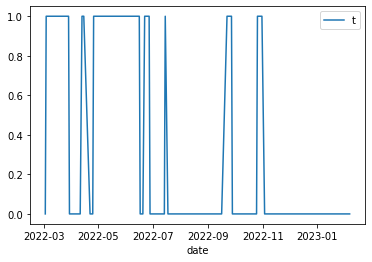

In [930]:

bb = stk['差額']>100
cc = stk['差額']<-50
hold = pd.DataFrame(np.nan, index=stk.index, columns=['t'])

hold[bb] = 1
hold[cc] = 0
hold.ffill(inplace=True)
hold.fillna(0, inplace=True)
hold
hold = hold.shift()
hold.plot()

In [932]:
bb

hold1 = pd.DataFrame(np.nan, index=stk.index, columns=['t'])

hold1[bb] = 1
hold1

,t
date,
2022-03-01,NaN
2022-03-03,1.0
2022-03-04,1.0
2022-03-07,1.0
2022-03-08,1.0
...,...
2023-01-16,NaN
2023-01-17,NaN
2023-01-31,NaN


In [906]:
hold

,券商名稱,買進張數,賣出張數,差額,stockid,mainBroker,subBroker
date,,,,,,,
2022-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-03,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2022-03-04,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2022-03-07,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2022-03-08,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
2023-01-16,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-01-17,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-01-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
from finlab.data import Data

data = Data()

_s2888_ = data.get("收盤價")
_s2888_ = _s2888_['2330']
_s2888_ = pd.DataFrame(_s2888_)
_s2888_

In [860]:
_s2888_['broker_diff'] = stk['差額'] 
_s2888_ =_s2888_.sort_index()
_s2888_.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3678 entries, 2007-04-23 to 2022-04-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   2330         3678 non-null   float64
 1   broker_diff  18 non-null     object 
dtypes: float64(1), object(1)
memory usage: 71.8+ KB


In [24]:
def MakeBroidData():
    df=pd.read_csv('broker_id.csv',encoding='utf-8',sep='\\s+')
    df['subBroderId'] = ''
    df['MainBroder'] = 'N'

    for bdidx in df.index:
        s1 = df['證券商名稱'][bdidx].split('-')
        if len(s1) == 2:
            df['證券商名稱'][bdidx]=s1[0]
            df['subBroderId'][bdidx]=s1[1]
        else:
            df['MainBroder'][bdidx] = 'Y'
            df['subBroderId'][bdidx]=s1[0]
    return df


In [ ]:
df = MakeBroidData()
sss = df[df['證券商名稱']=='統一']
sss

相關係數計算

In [62]:
import numpy as np

arr1 = [1, 2, 1, 4, 1]
arr2 = [1, 3, -6, 7, 7]

correlation = np.corrcoef(arr1, arr2)[0, 1]
print("Correlation:", correlation)


Correlation: 0.5144957554275265


In [25]:
import pandas as pd

from finlab.data import Data

#data = Data()
#df = data.get('price')
df = pd.read_pickle('history/date_range.pickle')
df['price']

#(Timestamp('2022-04-01 00:00:00'), Timestamp('2023-02-09 00:00:00'))


(Timestamp('2017-01-03 00:00:00'), Timestamp('2023-05-30 00:00:00'))

In [26]:
print(type(df))
import datetime
import pandas as pd
import pickle
d1 = pd.to_datetime(datetime.date(2017,1,1))
d2 = pd.to_datetime(datetime.date(2017,1,1))


<class 'dict'>


In [27]:
df['twse_divide_ratio'] = (d1,d2)

file_name = 'history/date_range.pickle'
with open(file_name, "wb") as f:
    pickle.dump(df,f)

In [51]:
from finlab.crawler import table_date_range, update_table, to_pickle, out
from finlab.crawler import (
    crawl_price,
    crawl_bargin,
    crawl_pe,
    crawl_monthly_report,
    crawl_finance_statement_by_date,
    crawl_benchmark,
    crawl_twse_divide_ratio,
    crawl_otc_divide_ratio,
    crawl_twse_cap_reduction,
    crawl_otc_cap_reduction,


    date_range,
    month_range,
    season_range,

    widget, out,
    commit,
)


import datetime

from inspect import signature
import requests.packages.urllib3
import warnings
warnings.filterwarnings("ignore")

requests.packages.urllib3.disable_warnings()

def auto_update(table_name, crawl_function, time_range=None):

    sig = signature(crawl_function)

    if len(sig.parameters) != 0:
        first_date, last_date = table_date_range(table_name)
        dates = time_range(last_date, datetime.datetime.now())
        if dates:
            update_table(table_name, crawl_function, dates)
    else:
        df = crawl_function()
        to_pickle(df, table_name)


auto_update('price', crawl_price, date_range)
#auto_update('bargin_report', crawl_bargin, date_range)
#auto_update('pe', crawl_pe, date_range)
#auto_update('benchmark', crawl_benchmark, date_range)
#auto_update('monthly_report', crawl_monthly_report, month_range)
#auto_update('twse_divide_ratio', crawl_twse_divide_ratio)
#auto_update('otc_divide_ratio', crawl_otc_divide_ratio)
#auto_update('twse_cap_reduction', crawl_twse_cap_reduction)
#auto_update('otc_cap_reduction', crawl_otc_cap_reduction)
commit()


FileNotFoundError: [WinError 3] 系統找不到指定的路徑。: 'history\\tables'

In [58]:
df = pd.read_csv('broker_id1.csv')
dd = df[df['代號'] =='5380']
dd.index[0]

162

In [11]:
import pandas as pd
def loadBrokerPikle(Mborkerid):
    try:
        fullsell = pd.read_pickle(f'.\\broker\\broker_sell_{Mborkerid}.pkl')
        fullbuy = pd.read_pickle(f'.\\broker\\broker_buy_{Mborkerid}.pkl')

    except Exception as e:
        print(str(e))
        fullbuy = None
        fullsell = None
    return fullbuy,fullsell
s = 'ss'
fullbuy,fullsell = loadBrokerPikle('1020')

In [20]:
s1 = fullbuy['stockid']
s2 = fullsell['stockid']
fullbuy = fullbuy.append(fullsell)
fullbuy['stockid']
fullbuy.drop_duplicates(subset=['stockid'],inplace=True)
len(fullbuy)
fullbuy['stockid']

0            
0        4157
0        2412
0        1584
0        1795
         ... 
10563    1259
10628    8906
10735    6763
11270    4420
11361    6194
Name: stockid, Length: 1694, dtype: object

In [21]:
s1 = s1.append(s2)
s1

0            
0        4157
0        2412
0        1584
0        1795
         ... 
11399        
11399    6278
11399        
11399    6138
11399    6285
Name: stockid, Length: 132044, dtype: object